# ESPnet Speech Translation Benchmarking

See also

- ESPnet: https://github.com/espnet/espnet
- ESPnet documentation: https://espnet.github.io/espnet/
- https://github.com/mjpost/sacrebleu
- Source code for speech translation inference: https://github.com/espnet/espnet/blob/master/espnet2/bin/st_inference.py
- Source code for speech translation model: https://github.com/espnet/espnet/blob/master/espnet2/st/espnet_model.py
- Pretrained model that's used: https://huggingface.co/espnet/brianyan918_mustc-v2_en-de_st_conformer_asrinit_v2_raw_en_de_bpe_tc4000_sp

## Install

In [ ]:
# OS setup
!cat /etc/os-release
!apt-get install -qq bc tree sox cmake flac

PRETTY_NAME="Ubuntu 22.04.2 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.2 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy
Selecting previously unselected package bc.
(Reading database ... 120875 files and directories currently installed.)
Preparing to unpack .../0-bc_1.07.1-3build1_amd64.deb ...
Unpacking bc (1.07.1-3build1) ...
Selecting previously unselected package flac.
Preparing to unpack .../1-flac_1.3.3-2ubuntu0.2_amd64.deb ...
Unpacking flac (1.3.3-2ubuntu0.2) ...
Selecting previously unselected package libopencore-amrnb0:amd64.
Preparing to unpack .../2-libopencore-amrnb0_0.1.5-1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.5-1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing t

In [ ]:
# espnet and moses setup
!git clone --depth 5 -b master https://github.com/espnet/espnet.git

%cd /content/espnet/tools
!./setup_python.sh $(command -v python3)

Cloning into 'espnet'...
remote: Enumerating objects: 6892, done.
remote: Counting objects: 100% (6892/6892), done.
remote: Compressing objects: 100% (4821/4821), done.
remote: Total 6892 (delta 2358), reused 3792 (delta 1304), pack-reused 0
Receiving objects: 100% (6892/6892), 16.92 MiB | 17.79 MiB/s, done.
Resolving deltas: 100% (2358/2358), done.
/content/espnet/tools
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
%cd /content/espnet/tools
# !make CPU_ONLY=0
!make
!make moses.done

/content/espnet/tools
Perform on CPU mode: CPU_ONLY=0
PYTHON=/usr/bin/python3
PYTHON_VERSION=Python 3.10.12
USE_CONDA=
TH_VERSION=2.0.1
WITH_OMP=ON
. ./activate_python.sh && python3 -m pip install packaging
touch packaging.done
. ./activate_python.sh && python3 -m pip install "numpy<1.24"
. ./activate_python.sh && python3 -m pip install -U numba
  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/e7/69/d228b38ffb70858d74538bdfe5aa18c7640b7f07840239690985b3a94009/numba-0.58.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata
  Obtaining dependency information for llvmlite<0.42,>=0.41.0dev0 from https://files.pythonhosted.org/packages/50/df/38c9fb5cc64f4fcc0577a14a0665c2a5de74f45a621ac7708320b1ac80c6/llvmlite-0.41.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 15.2 MB/s eta 0:00

In [ ]:
%cd /content/espnet
!pip install .

!pip install deepspeed

/content/espnet
Processing /content/espnet
  Preparing metadata (setup.py) ... done
  Created wheel for espnet: filename=espnet-202308-py3-none-any.whl size=1640759 sha256=73a4a4d6cfa7e3e3bb5411b43ac67b9abb5ed6d8bd27e0dbd1425b972baf8597
  Stored in directory: /tmp/pip-ephem-wheel-cache-elrtorqf/wheels/96/bf/28/3dcb52e8ea646bd4adde58c7b0a23d3e85b8d981f3b3255301
Successfully built espnet
  Attempting uninstall: espnet
    Found existing installation: espnet 202308
    Uninstalling espnet-202308:
      Successfully uninstalled espnet-202308


## Download Model File

In [ ]:
%cd /content
# en -> es
# !gdown 1Sn2rAZXVSm1hrCj5OIlq61EgbjKXNGdq
# !unzip -o st_train_st_ctc_md_conformer_asrinit_v3_noamp_batch50m_ctcsamp0.1_lr1e-3_raw_en_es_bpe_tc4000_sp_valid.acc.ave.zip

# en -> de model from this: https://github.com/espnet/espnet/blob/master/egs2/must_c_v2/st1/conf/tuning/train_st_conformer_asrinit_v2.yaml
!git lfs install
!git clone https://huggingface.co/espnet/brianyan918_mustc-v2_en-de_st_conformer_asrinit_v2_raw_en_de_bpe_tc4000_sp pretrained

tgt_lang="en"
src_lang="de"

/content
Git LFS initialized.
Cloning into 'pretrained'...
remote: Enumerating objects: 42, done.
remote: Total 42 (delta 0), reused 0 (delta 0), pack-reused 42
Unpacking objects: 100% (42/42), 563.24 KiB | 2.05 MiB/s, done.


## Save output statistics

1. save the outputs of vary model size to `/content/output/model_size_output.json`
2. save the outputs of vary input size to `/content/output/input_size_output.json`
3. save the outputs of put all together to `/content/output/put_all_output.json[link text](https://)`


In [ ]:
import os
import json
from typing import List
%mkdir /content/output

In [ ]:
VARY_MODEL_SIZE = 'vary_model_size'
VARY_INPUT_SIZE = 'vary_input_size'
PUT_ALL_TOGETHER = 'put_all_together'

EXP_OUTPUT_FILE = {
    VARY_MODEL_SIZE: 'model_size_output.json',
    VARY_INPUT_SIZE: 'input_size_output.json',
    PUT_ALL_TOGETHER: 'put_all_output.json'
}

In [ ]:
def save_exp_statistics(data: List, path: str):
  full_path = f'/content/output/{path}'
  assert(len(data) in {1,2})
  if os.path.exists(full_path):
    with open(full_path, 'r') as f:
      old_stat = json.load(f)
      if len(data) == 2:
        old_stat['score'].append(data[0])
        old_stat['latency'].append(data[1])
      else:
        old_stat['flop'].append(data[0])
    with open(full_path, 'w') as f:
      json.dump(old_stat,f,indent=4)
  else:
    with open(full_path, 'w') as f:
      stat = {
          'score':[],
          'latency':[],
          'flop':[]
      }
      if len(data) == 2:
        stat['score'].append(data[0])
        stat['latency'].append(data[1])
      else:
        stat['flop'].append(data[0])
      json.dump(stat,f,indent=4)

## Load Original Pre-trained Model

In [ ]:
%cd /content/pretrained

import time
import torch
import string
from espnet2.bin.st_inference import Speech2Text


def init_inference_pipeline(
    model_file: str,
    config_file: str,
    beam_size=10,
    **kwargs,
):
    # a wrapper responsible for calling the actual pytorch model
    return Speech2Text(
        st_model_file=model_file,
        st_train_config=config_file,
        beam_size=beam_size,
        device="cpu",
        **kwargs,
    )


pretrained_model="exp/st_train_st_conformer_asrinit_v2_raw_en_de_bpe_tc4000_sp/valid.acc.ave_10best.pth"
pretrained_config="exp/st_train_st_conformer_asrinit_v2_raw_en_de_bpe_tc4000_sp/config.yaml"

# Using decode settings from: https://github.com/espnet/espnet/blob/master/egs2/must_c_v2/st1/conf/tuning/decode_st_conformer.yaml
pipeline = init_inference_pipeline(
    pretrained_model, pretrained_config,
)

# Print the pytorch module
# **Use this to calculate FLOPs**
print(pipeline.st_model)

/content/pretrained


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


ESPnetSTModel(
  (frontend): DefaultFrontend(
    (stft): Stft(n_fft=400, win_length=400, hop_length=160, center=True, normalized=False, onesided=True)
    (frontend): Frontend()
    (logmel): LogMel(sr=16000, n_fft=400, n_mels=80, fmin=0, fmax=8000.0, htk=False)
  )
  (specaug): SpecAug(
    (time_warp): TimeWarp(window=5, mode=bicubic)
    (freq_mask): MaskAlongAxis(mask_width_range=[0, 27], num_mask=2, axis=freq)
    (time_mask): MaskAlongAxisVariableMaxWidth(mask_width_ratio_range=[0.0, 0.05], num_mask=5, axis=time)
  )
  (normalize): GlobalMVN(stats_file=exp/st_stats_raw_en_de_bpe4000_sp/train/feats_stats.npz, norm_means=True, norm_vars=True)
  (encoder): ConformerEncoder(
    (embed): Conv2dSubsampling(
      (conv): Sequential(
        (0): Conv2d(1, 256, kernel_size=(3, 3), stride=(2, 2))
        (1): ReLU()
        (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2))
        (3): ReLU()
      )
      (out): Sequential(
        (0): Linear(in_features=4864, out_features=256

### Run this model using some test utterances and calculate BLEU score


In [ ]:
!git clone https://github.com/tjysdsg/must_c_test_subset

Cloning into 'must_c_test_subset'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 44 (delta 1), reused 2 (delta 1), pack-reused 37
Receiving objects: 100% (44/44), 70.69 MiB | 39.09 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
# Load test data (520 utterances out of MUST_C_v2 TST-COMMON subset)
data_dir = '/content/pretrained/must_c_test_subset'
%cd /content/pretrained/must_c_test_subset


from kaldiio import ReadHelper


utt2wav = {}
with ReadHelper(f'scp:{data_dir}/wav.scp') as reader:
    for utt, (rate, wav) in reader:
        # print(utt, rate, wav)
        utt2wav[utt] = wav


utt2src_text = {}
with open(f'{data_dir}/text') as f:
    for line in f:
        utt, text = line.rstrip('\n').split(maxsplit=1)
        utt2src_text[utt] = text


utt2tgt_text = {}
with open(f'{data_dir}/text.tc.de') as f:
    for line in f:
        utt, text = line.rstrip('\n').split(maxsplit=1)
        utt2tgt_text[utt] = text


/content/pretrained/must_c_test_subset


**Calculate BLEU of the test set using the original model, follow this code to implement latency benchmarking code**

In [ ]:
import torch
import pandas as pd
import soundfile as sf
import librosa.display
from IPython.display import display, Audio
import matplotlib.pyplot as plt
from sacrebleu.metrics import BLEU
import time
from deepspeed.profiling.flops_profiler import FlopsProfiler
%cd /content/pretrained


def test_st_model(
    st_pipeline: Speech2Text,
    utt2wav,
    utt2src_text,
    utt2tgt_text,
    num_utts=-1,  # number of utterances used for testing if positive
):
    bleu = BLEU()
    fs = 16000

    test_data = list(utt2wav.items())
    if num_utts > 0:
        test_data = test_data[:num_utts]

    preds = []

    total_time = 0
    prof = FlopsProfiler(st_pipeline.st_model)
    prof.start_profile()
    for i, (utt, speech) in enumerate(test_data):
        # speech, rate = sf.read(path)
        # assert int(row["sr"]) == fs

        start = time.perf_counter()
        text, tokens, _, _ = st_pipeline(speech)[0]

        # FIXME: somehow this model's tokenizer
        #   cannot convert tokens back to text properly
        text = ''.join(tokens).replace('▁', ' ')
        preds.append(text)

        # If you wanna hear input speech
        # display(Audio(speech, rate=fs))

        print(f"Reference source text: {utt2src_text[utt]}")
        print(f"Translation results: {text}")
        tgt_text = utt2tgt_text[utt]
        print(f"Reference target text: {tgt_text}")
        print(f"Sentence BLEU Score: {bleu.sentence_score(text, [tgt_text])}")
        print("-" * 50)
        end = time.perf_counter()
        if i > 0:
          total_time += end-start


    prof.stop_profile()
    refs = [[t] for t in utt2tgt_text.values()]
    res = bleu.corpus_score(preds, refs)
    print(f'BLEU score of {len(test_data)} utterances is: {res}')
    avg_latency = total_time / (len(test_data)-1)
    print(f'Average inference latency is: {avg_latency}s')
    return res.score, avg_latency, int(prof.get_total_flops()/len(test_data))

/content/pretrained


In [ ]:
# baseline results
score, latency, flop = test_st_model(pipeline, utt2wav, utt2src_text, utt2tgt_text, num_utts=10)

# save baseline results to each output category
%rm -rf /content/output/*
save_exp_statistics([flop],EXP_OUTPUT_FILE[VARY_MODEL_SIZE])
save_exp_statistics([flop],EXP_OUTPUT_FILE[VARY_INPUT_SIZE])
save_exp_statistics([flop],EXP_OUTPUT_FILE[PUT_ALL_TOGETHER])

Reference source text: back in new york i am the head of development for a nonprofit called robin hood
Translation results:  In New York bin ich Leiter einer gemeinnützigen Organisation namens Robin Hood .
Reference target text: Zu Hause in New York , bin ich Chef der Entwicklungsabteilung einer gemeinnützigen Organisation namens Robin Hood .
Sentence BLEU Score: BLEU = 38.52 84.6/66.7/45.5/40.0 (BP = 0.681 ratio = 0.722 hyp_len = 13 ref_len = 18)
--------------------------------------------------


Reference source text: when i &apos;m not fighting poverty i &apos;m fighting fires as the assistant captain of a volunteer fire company
Translation results:  Wenn ich keine Armut bekämpfe , ich bekämpfe Feuer , ist das die Assistenzkapitin einer freiwilligen Feuerkonzerne .
Reference target text: Wenn ich nicht die Armut bekämpfe , bekämpfe ich als Gehilfe eines Feuerwehr-Hauptmanns bei einem freiwilligen Löschzug das Feuer .
Sentence BLEU Score: BLEU = 11.20 66.7/17.6/6.2/3.3 (BP = 0.895 ratio = 0.900 hyp_len = 18 ref_len = 20)
--------------------------------------------------


Reference source text: now in our town where the volunteers supplement a highly skilled career staff you have to get to the fire scene pretty early to get in on any action
Translation results:  In unserer Stadt , wo die Freiwilligen eine hoch qualifizierte Karrieremitglieder ergänzen , muss man ziemlich früh zur Feuerszene gelangen , um jede Handlung einzusteigen .
Reference target text: Nun , in unserer Stadt , in der Freiwillige eine hochqualifizierte Berufsfeuerwehr unterstützten , muss man ziemlich früh an der Brandstelle sein , um mitmischen zu können .
Sentence BLEU Score: BLEU = 19.26 46.2/28.0/16.7/8.7 (BP = 0.926 ratio = 0.929 hyp_len = 26 ref_len = 28)
--------------------------------------------------


Reference source text: i remember my first fire
Translation results:  Ich erinnere mich an mein erstes Feuer .
Reference target text: Ich erinnere mich an mein erstes Feuer .
Sentence BLEU Score: BLEU = 100.00 100.0/100.0/100.0/100.0 (BP = 1.000 ratio = 1.000 hyp_len = 8 ref_len = 8)
--------------------------------------------------


Reference source text: i was the second volunteer on the scene so there was a pretty good chance i was going to get in
Translation results:  Ich war der zweite Freiwillige auf der Szene , also war es eine ziemlich gute Chance , dass ich reinkommen würde .
Reference target text: Ich war der zweite Freiwillige an der Brandstelle , ich hatte also recht gute Chancen hinein zu können .
Sentence BLEU Score: BLEU = 19.69 50.0/19.0/15.0/10.5 (BP = 1.000 ratio = 1.158 hyp_len = 22 ref_len = 19)
--------------------------------------------------


Reference source text: but still it was a real footrace against the other volunteers to get to the captain in charge to find out what our assignments would be
Translation results:  Aber trotzdem war es ein echtes Rennen gegen die anderen Freiwilligen , die den Kapitän zusteuerten , um herauszufinden , was unsere Aufgabe sein würde .
Reference target text: Aber es war immer noch ein Wettrennen gegen die anderen Freiwilligen um den verantwortlichen Hauptmann zu erreichen und herauszufinden was unsere Aufgaben sein würden .
Sentence BLEU Score: BLEU = 13.52 57.7/16.0/8.3/4.3 (BP = 1.000 ratio = 1.040 hyp_len = 26 ref_len = 25)
--------------------------------------------------


Reference source text: when i found the captain he was having a very engaging conversation with the homeowner who was surely having one of the worst days of her life
Translation results:  Als ich den Kapitän fand , führte er einen sehr engagierten Gespräch mit dem Hausbesitzer , der sicherlich einen der schlimmsten Tage ihres Lebens hatte .
Reference target text: Als ich den Hauptmann fand , hatte er gerade in eine sehr ernste Unterhaltung mit der Hausbesitzerin , die sicherlich einen der schlimmsten Tage ihres Lebens hatte .
Sentence BLEU Score: BLEU = 37.86 73.1/44.0/33.3/26.1 (BP = 0.926 ratio = 0.929 hyp_len = 26 ref_len = 28)
--------------------------------------------------


Reference source text: here it was the middle of the night she was standing outside in the pouring rain under an umbrella in her pajamas barefoot while her house was in flames
Translation results:  Hier war es mitten in der Nacht . Sie stand draußen im schüttelnden Regen , unter dem Schirm , im Barfuß , während ihr Haus in Flammen war .
Reference target text: Es war mitten in der Nacht und sie stand im Schlafanzug und barfuß unter einem Schirm draußen im strömenden Regen , während ihr Haus in Flammen stand .
Sentence BLEU Score: BLEU = 29.91 65.5/35.7/22.2/15.4 (BP = 1.000 ratio = 1.036 hyp_len = 29 ref_len = 28)
--------------------------------------------------


Reference source text: the other volunteer who had arrived just before me let &apos;s call him lex luther laughter got to the captain first and was asked to go inside and save the homeowner &apos;s dog the dog i was stunned with jealousy
Translation results:  Der andere Freiwillige , der gerade vor mir ankam - nennen wir ihn &quot; Lax Luther &quot; . ( Gelächter ) - wurde gebeten , den Hund des Hausbesitzers zu retten . Oh , ich war verblüfft von Eifersucht .
Reference target text: Der andere Freiwillige , der knapp vor mir angekommen war -- nennen wir ihn Lex Luther -- ( Gelächter ) erreichte den Hauptmann als erstes und wurde gebeten in das Haus zu gehen und den Hund der Hausbesitzerin zu retten . Den Hund ! Ich war sprachlos vor Neid .
Sentence BLEU Score: BLEU = 15.66 57.5/33.3/15.8/5.4 (BP = 0.779 ratio = 0.800 hyp_len = 40 ref_len = 50)
--------------------------------------------------


Reference source text: here was some lawyer or money manager who for the rest of his life gets to tell people that he went into a burning building to save a living creature just because he beat me by five seconds
Translation results:  Hier ist ein Anwalt oder Geldmanager , der für den Rest seines Lebens den Leuten erzählt , dass er in ein brennendes Gebäude ging , um ein lebendes Wesen zu retten , nur weil er mich um fünf Sekunden schlägt .
Reference target text: Da war irgendein Anwalt oder Vermögensverwalter , der nun für den Rest seines Lebens , den Menschen erzählen konnte , dass er in ein brennendes Haus ging um ein Lebewesen zu retten , nur weil er fünf Sekunden schneller war als ich .
Sentence BLEU Score: BLEU = 35.31 70.7/45.0/28.2/21.1 (BP = 0.952 ratio = 0.953 hyp_len = 41 ref_len = 43)
--------------------------------------------------
BLEU score of 10 utterances is: BLEU = 57.84 92.3/66.7/45.5/40.0 (BP = 1.000 ratio = 1.000 hyp_len = 13 ref_len = 13)
Average inference laten

# Change the model size

1. Load config.yaml (open "/content/pretrained/exp/st_train_st_conformer_asrinit_v2_raw_en_de_bpe_tc4000_sp/config.yaml" and take a look), change some settings, and save it to a new file
3. Initialize an empty ST model using the new yaml file
4. Copy (part of) original model weights to this new model and save it to a new checkpoint


Settings that we are interested in:

```yaml
# Acoustic encoder
encoder: conformer
encoder_conf:
    # must keep the ratio of (linear_units / attention_heads) the same as before
    output_size: 256
    attention_heads: 4
    linear_units: 2048
    num_blocks: 12
    dropout_rate: 0.1
    positional_dropout_rate: 0.1
    attention_dropout_rate: 0.1
    input_layer: conv2d
    normalize_before: true
    macaron_style: true
    rel_pos_type: latest
    pos_enc_layer_type: rel_pos
    selfattention_layer_type: rel_selfattn
    activation_type: swish
    use_cnn_module: true
    cnn_module_kernel: 31

# Decoder for the actual translation
decoder: transformer
decoder_conf:
    # must keep the ratio of (linear_units / attention_heads) the same as before
    attention_heads: 4
    linear_units: 2048
    num_blocks: 6
    dropout_rate: 0.1
    positional_dropout_rate: 0.1
    self_attention_dropout_rate: 0.1
    src_attention_dropout_rate: 0.1

# Some extra encoder layers used only for the decoder
extra_asr_decoder: transformer
extra_asr_decoder_conf:
    input_layer: embed
    num_blocks: 6
    linear_units: 2048
    dropout_rate: 0.1
```

## 1. Change yaml configs


In [ ]:
import yaml


def modify_config(config_path: str, new_config_path: str, modifier):
    with open(config_path, "r") as f:
        config = yaml.safe_load(f)

    config = modifier(config)

    with open(new_config_path, "w") as f:
        yaml.dump(config, f)


**Pass in your own `modifier` function when calling `modify_config`**.

In [ ]:
def example_modifier(config: dict):
    config['decoder_conf']['num_blocks'] = 4
    config['decoder_conf']['attention_heads'] = 2
    config['decoder_conf']['linear_units'] = 1024
    return config


new_config_file="new_config.yaml"
modify_config(pretrained_config, new_config_file, modifier=example_modifier)

## 2. Build an empty ST model using the new config

In [ ]:
from espnet2.tasks.st import STTask


new_model, _ = STTask.build_model_from_file(
    new_config_file, device='cpu'
)
print(new_model)

ESPnetSTModel(
  (frontend): DefaultFrontend(
    (stft): Stft(n_fft=400, win_length=400, hop_length=160, center=True, normalized=False, onesided=True)
    (frontend): Frontend()
    (logmel): LogMel(sr=16000, n_fft=400, n_mels=80, fmin=0, fmax=8000.0, htk=False)
  )
  (specaug): SpecAug(
    (time_warp): TimeWarp(window=5, mode=bicubic)
    (freq_mask): MaskAlongAxis(mask_width_range=[0, 27], num_mask=2, axis=freq)
    (time_mask): MaskAlongAxisVariableMaxWidth(mask_width_ratio_range=[0.0, 0.05], num_mask=5, axis=time)
  )
  (normalize): GlobalMVN(stats_file=exp/st_stats_raw_en_de_bpe4000_sp/train/feats_stats.npz, norm_means=True, norm_vars=True)
  (encoder): ConformerEncoder(
    (embed): Conv2dSubsampling(
      (conv): Sequential(
        (0): Conv2d(1, 256, kernel_size=(3, 3), stride=(2, 2))
        (1): ReLU()
        (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2))
        (3): ReLU()
      )
      (out): Sequential(
        (0): Linear(in_features=4864, out_features=256

## Copy weights to the new model and save to file

This works as long as the new model has fewer/equal number of layers or smaller/same layer sizes

In [ ]:
def copy_state_dict(dst_state, src_state):
    ret = {}
    for key, value in src_state.items():
        if key in dst_state and (dst_state[key].size() == src_state[key].size()):
            ret[key] = value
        elif key not in dst_state:
            print(f"Skipping `{key}` from pretrained dict because of it's not found in target dict")
        else:
            dst_size = dst_state[key].shape
            src_size = src_state[key].shape
            n = len(dst_size)
            assert n == len(src_size)

            idx = []
            for ss, ds in zip(src_size, dst_size):
              assert ss >= ds
              idx.append(slice(ds))

            print(f"Changing layer size of `{key}` from {src_size} to {dst_size}")
            ret[key] = src_state[key][idx]
    return ret


In [ ]:
new_state_dict = copy_state_dict(new_model.state_dict(), pipeline.st_model.state_dict())

torch.save(new_state_dict, 'new_model.pth')

Changing layer size of `decoder.decoders.0.feed_forward.w_1.weight` from torch.Size([2048, 256]) to torch.Size([1024, 256])
Changing layer size of `decoder.decoders.0.feed_forward.w_1.bias` from torch.Size([2048]) to torch.Size([1024])
Changing layer size of `decoder.decoders.0.feed_forward.w_2.weight` from torch.Size([256, 2048]) to torch.Size([256, 1024])
Changing layer size of `decoder.decoders.1.feed_forward.w_1.weight` from torch.Size([2048, 256]) to torch.Size([1024, 256])
Changing layer size of `decoder.decoders.1.feed_forward.w_1.bias` from torch.Size([2048]) to torch.Size([1024])
Changing layer size of `decoder.decoders.1.feed_forward.w_2.weight` from torch.Size([256, 2048]) to torch.Size([256, 1024])
Changing layer size of `decoder.decoders.2.feed_forward.w_1.weight` from torch.Size([2048, 256]) to torch.Size([1024, 256])
Changing layer size of `decoder.decoders.2.feed_forward.w_1.bias` from torch.Size([2048]) to torch.Size([1024])
Changing layer size of `decoder.decoders.2.f

## Construct a new inference pipeline using the new weights

In [ ]:
new_pipeline = init_inference_pipeline(
    'new_model.pth', new_config_file,
)

print(new_pipeline.st_model)

ESPnetSTModel(
  (frontend): DefaultFrontend(
    (stft): Stft(n_fft=400, win_length=400, hop_length=160, center=True, normalized=False, onesided=True)
    (frontend): Frontend()
    (logmel): LogMel(sr=16000, n_fft=400, n_mels=80, fmin=0, fmax=8000.0, htk=False)
  )
  (specaug): SpecAug(
    (time_warp): TimeWarp(window=5, mode=bicubic)
    (freq_mask): MaskAlongAxis(mask_width_range=[0, 27], num_mask=2, axis=freq)
    (time_mask): MaskAlongAxisVariableMaxWidth(mask_width_ratio_range=[0.0, 0.05], num_mask=5, axis=time)
  )
  (normalize): GlobalMVN(stats_file=exp/st_stats_raw_en_de_bpe4000_sp/train/feats_stats.npz, norm_means=True, norm_vars=True)
  (encoder): ConformerEncoder(
    (embed): Conv2dSubsampling(
      (conv): Sequential(
        (0): Conv2d(1, 256, kernel_size=(3, 3), stride=(2, 2))
        (1): ReLU()
        (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2))
        (3): ReLU()
      )
      (out): Sequential(
        (0): Linear(in_features=4864, out_features=256

## Run the new model

In [ ]:
score, latency, flop = test_st_model(new_pipeline, utt2wav, utt2src_text, utt2tgt_text, num_utts=10)

Reference source text: back in new york i am the head of development for a nonprofit called robin hood
Translation results:  Ich bin dafür , dass ich meine damit umweltbehin mit dem Thema &quot; Das ist &quot; .
Reference target text: Zu Hause in New York , bin ich Chef der Entwicklungsabteilung einer gemeinnützigen Organisation namens Robin Hood .
Sentence BLEU Score: BLEU = 3.05 23.5/3.1/1.7/0.9 (BP = 0.943 ratio = 0.944 hyp_len = 17 ref_len = 18)
--------------------------------------------------


Reference source text: when i &apos;m not fighting poverty i &apos;m fighting fires as the assistant captain of a volunteer fire company
Translation results:  Und wenn man sich nicht an derzeitige , dass ich mich dann nicht sogar nochmal sogar &quot; Das ist &quot; .
Reference target text: Wenn ich nicht die Armut bekämpfe , bekämpfe ich als Gehilfe eines Feuerwehr-Hauptmanns bei einem freiwilligen Löschzug das Feuer .
Sentence BLEU Score: BLEU = 2.57 19.0/2.5/1.3/0.7 (BP = 1.000 ratio = 1.050 hyp_len = 21 ref_len = 20)
--------------------------------------------------


Reference source text: now in our town where the volunteers supplement a highly skilled career staff you have to get to the fire scene pretty early to get in on any action
Translation results:  Nun , in unserer Heimatläden , wo die Angehören ihren Umgang mit dem Thema &quot; Die &apos &apos; &quot; &quot; &quot; &quot; &quot; Das ist &quot; . &quot; Die &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot; . &quot & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & &
Reference target text: Nun , in unserer Stadt , in der Freiwillige eine hochqualifizierte Berufsfeuerwehr unterstützten , muss man ziemlich früh an der Brandstelle sein , um mitmischen zu können .
Sentence BLEU Score: BLEU = 1.41 3.4/1.7/1.2/0.6 (BP = 1.000 ratio = 6.250 hyp_len = 175 ref_len

Reference source text: i remember my first fire
Translation results:  Ich habe mich dann nochmal dann nochmal dann noch etwasäuschen .
Reference target text: Ich erinnere mich an mein erstes Feuer .
Sentence BLEU Score: BLEU = 4.93 27.3/5.0/2.8/1.6 (BP = 1.000 ratio = 1.375 hyp_len = 11 ref_len = 8)
--------------------------------------------------


Reference source text: i was the second volunteer on the scene so there was a pretty good chance i was going to get in
Translation results:  Ich habe mich mit dem Titel : &quot; Das ist &quot; .
Reference target text: Ich war der zweite Freiwillige an der Brandstelle , ich hatte also recht gute Chancen hinein zu können .
Sentence BLEU Score: BLEU = 2.25 16.7/4.5/2.5/1.4 (BP = 0.558 ratio = 0.632 hyp_len = 12 ref_len = 19)
--------------------------------------------------


Reference source text: but still it was a real footrace against the other volunteers to get to the captain in charge to find out what our assignments would be
Translation results:  Es ist aber auch noch mehr als die Einführungs-Ge-Bo-Com-Ge-Bo-Com-Bo-Strichte-Strichte-Streuer , aber auch nicht .
Reference target text: Aber es war immer noch ein Wettrennen gegen die anderen Freiwilligen um den verantwortlichen Hauptmann zu erreichen und herauszufinden was unsere Aufgaben sein würden .
Sentence BLEU Score: BLEU = 1.70 21.4/3.8/2.1/1.1 (BP = 0.456 ratio = 0.560 hyp_len = 14 ref_len = 25)
--------------------------------------------------


Reference source text: when i found the captain he was having a very engaging conversation with the homeowner who was surely having one of the worst days of her life
Translation results:  Und als ich mich mit dem Voraussagen über die meisten Menschen mit einer Frage nach einem anderen : &quot; Das ist .
Reference target text: Als ich den Hauptmann fand , hatte er gerade in eine sehr ernste Unterhaltung mit der Hausbesitzerin , die sicherlich einen der schlimmsten Tage ihres Lebens hatte .
Sentence BLEU Score: BLEU = 1.86 18.2/2.4/1.2/0.7 (BP = 0.761 ratio = 0.786 hyp_len = 22 ref_len = 28)
--------------------------------------------------


Reference source text: here it was the middle of the night she was standing outside in the pouring rain under an umbrella in her pajamas barefoot while her house was in flames
Translation results:  Und hier ist , wieso aus dem sie sich aus dem Treglieder ( Lachen ) &quot; Das ist &quot; .
Reference target text: Es war mitten in der Nacht und sie stand im Schlafanzug und barfuß unter einem Schirm draußen im strömenden Regen , während ihr Haus in Flammen stand .
Sentence BLEU Score: BLEU = 1.69 15.0/2.6/1.4/0.7 (BP = 0.670 ratio = 0.714 hyp_len = 20 ref_len = 28)
--------------------------------------------------


Reference source text: the other volunteer who had arrived just before me let &apos;s call him lex luther laughter got to the captain first and was asked to go inside and save the homeowner &apos;s dog the dog i was stunned with jealousy
Translation results:  Das andere ist , dass sie sich auf dem Weg nach einem anderen : &quot; Die &apos &apos; &quot; &quot; &quot; &quot; Der &quot; &quot &quot &quot &quot &quot &quot &quot; &quot; &quot; &quot; &quot &quot; &quot &quot &quot; &quot &quot &quot; &quot &quot; &quot &quot &quot; &quot &quot; &quot &quot &quot &quot; &quot &quot &quot; &quot &quot &quot &quot &quot &quot &quot; &quot &quot &quot &quot &quot &quot; &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot; &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot; &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &qu

Reference source text: here was some lawyer or money manager who for the rest of his life gets to tell people that he went into a burning building to save a living creature just because he beat me by five seconds
Translation results:  Und hier ist ein andererseits : &quot; Das ist &aposn &apos; &apos; &quot; &quot; &quot; &quot; &quot; &quot; &quot; Das ist &quot; . &quot &quot &quot &quot &quot &quot &quot &quot; &quot &quot &quot &quot; &quot &quot &quot &quot &quot; &quot &quot &quot &quot &quot; &quot &quot &quot &quot &quot &quot; &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot; &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot; &quot &quot &quot &quot &quot &quot &quot &quot &quot; . &quot &quot &quot &quot; &quot; &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot; &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot; &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot &quot
Reference target text: Da war

## Save output

In [ ]:
save_exp_statistics([flop], EXP_OUTPUT_FILE[VARY_MODEL_SIZE])

# Change input size

# Plot


In [ ]:
import matplotlib.pyplot as plt

def plot(path):
  assert(os.path.exists(path))
  fig_path_root = path[:-5]
  with open(path, 'r') as f:
    stat = json.load(f)
    assert(len(stat['score']) == len(stat['latency']))
    assert(len(stat['score']) == len(stat['flop']))
  plt.plot(stat['flop'], stat['score'])
  plt.xlabel('FLOPs')
  plt.ylabel('BLEU score')
  plt.title('BLEU score vs FLOPs')
  plt.savefig(fig_path_root+'_BLUE_vs_FLOP.png')
  plt.show()

  plt.plot(stat['latency'], stat['score'])
  plt.xlabel('latency (s)')
  plt.ylabel('BLEU score')
  plt.title('BLEU score vs latency')
  plt.savefig(fig_path_root+'_BLUE_vs_latency.png')
  plt.show()

  plt.plot(stat['flop'], stat['latency'])
  plt.xlabel('FLOPs')
  plt.ylabel('latency (s)')
  plt.title('latency (s) vs FLOPs')
  plt.savefig(fig_path_root+'_latency_vs_FLOP.png')
  plt.show()


## Change the model size

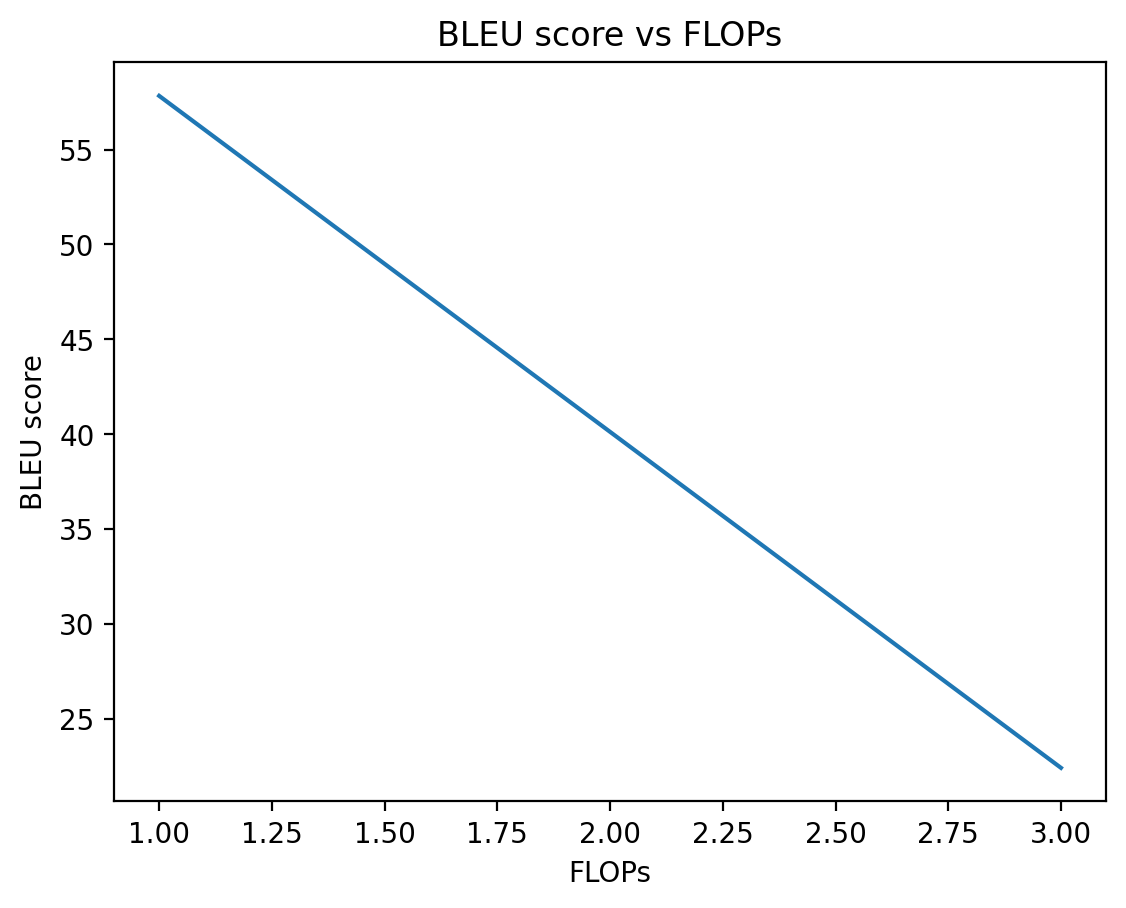

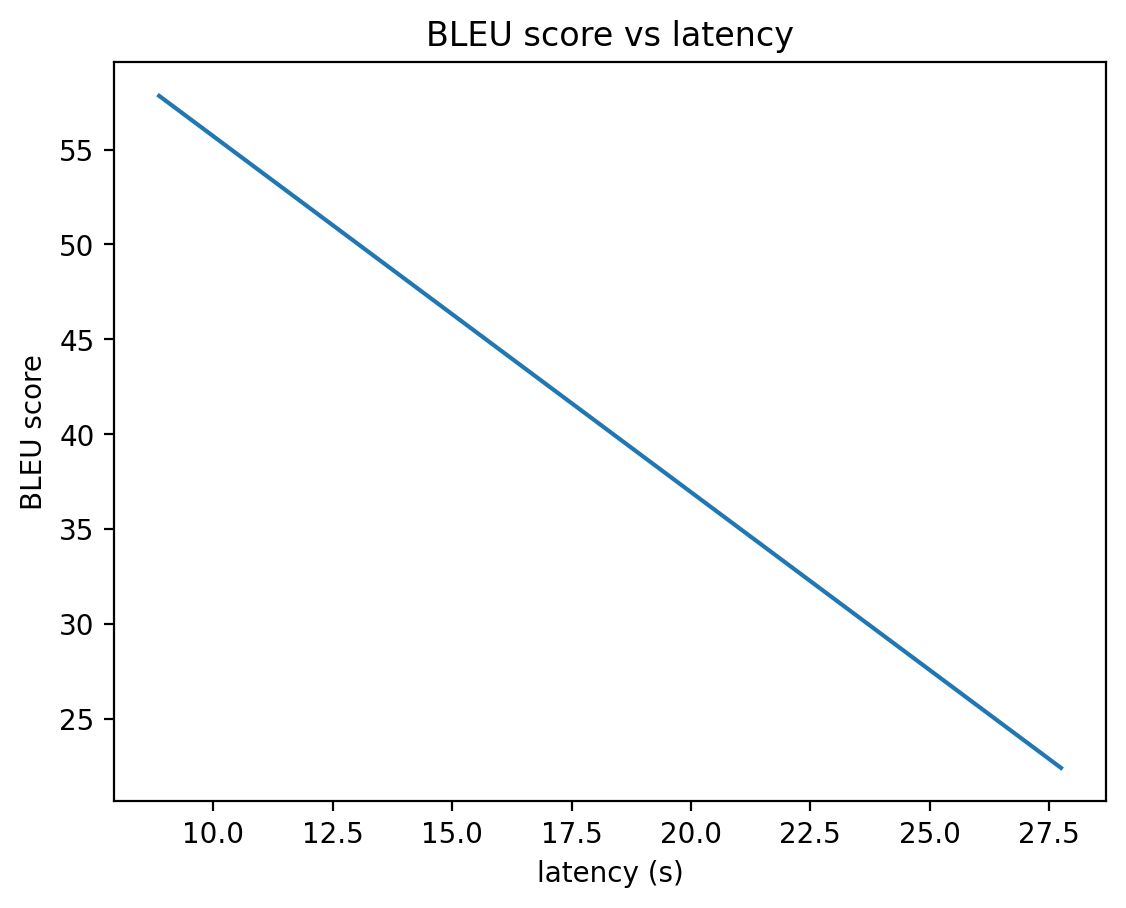

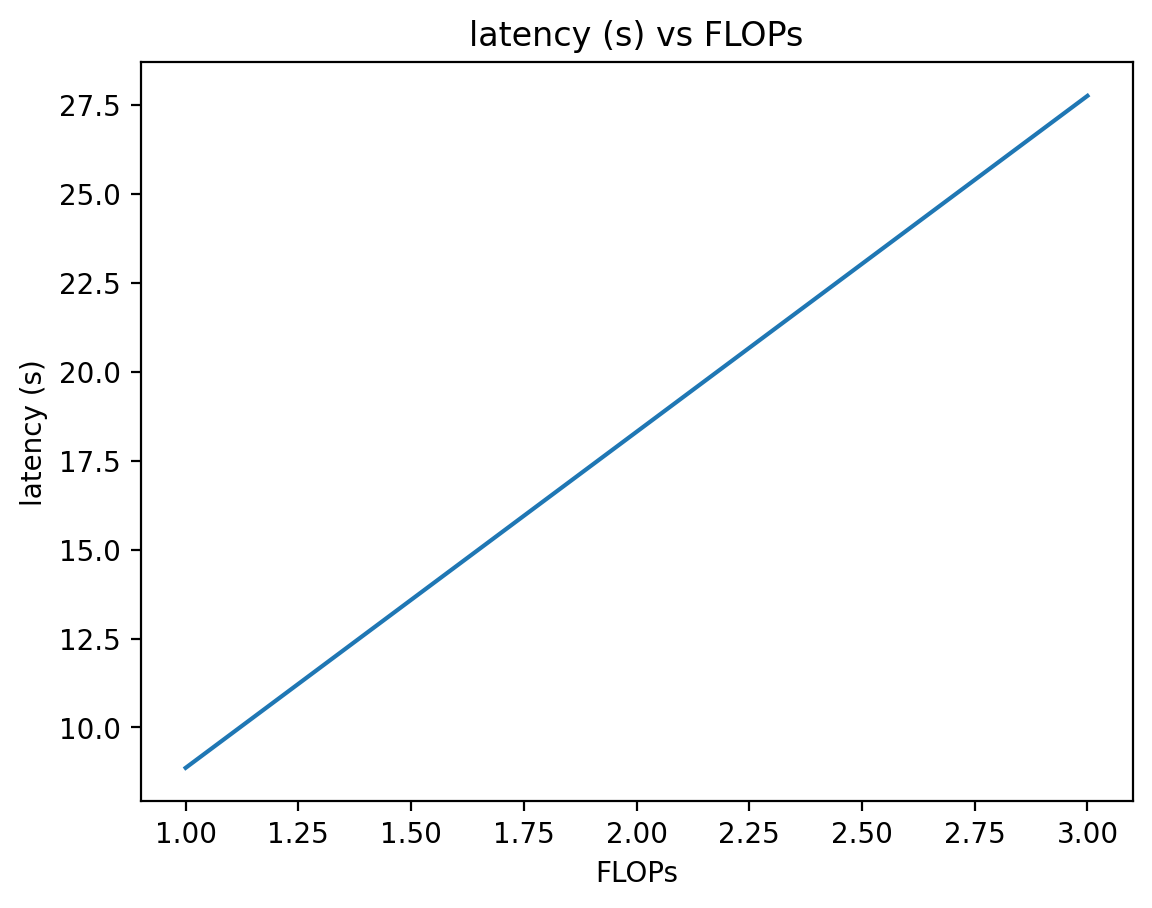

In [ ]:
path = f'/content/output/{EXP_OUTPUT_FILE[VARY_MODEL_SIZE]}'
plot(path)

## Change the input size

In [ ]:
path = f'/content/output/{EXP_OUTPUT_FILE[VARY_INPUT_SIZE]}'
plot(path)

## Put all together

In [ ]:
path = f'/content/output/{EXP_OUTPUT_FILE[PUT_ALL_TOGETHER]}'
plot(path)